In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [5]:
# load forward and recurrent simulations 
speed = 0.8
stimname = f'bar_{speed}'
dt = 0.001
delta = 0.005
N = 206

recurrent_bar_sigB = np.load(f'../output/recurrent_nn/{stimname}/BC_grid_{stimname}.npy')[N,:]
recurrent_bar_sigA = np.load(f'../output/recurrent_nn/{stimname}/AC_grid_{stimname}.npy')[N,:]
recurrent_bar_sigG = np.load(f'../output/recurrent_nn/{stimname}/GC_grid_{stimname}.npy')[N,:]

forward_bar_sigB = np.load(f'../output/forward_nn/{stimname}/BC_grid_{stimname}.npy')[N,:]
forward_bar_sigA = np.load(f'../output/forward_nn/{stimname}/AC_grid_{stimname}.npy')[N,:]
forward_bar_sigG = np.load(f'../output/forward_nn/{stimname}/GC_grid_{stimname}.npy')[N,:]


pooling_bar_sigB = np.load(f'../output/pooling_nn/{stimname}/BC_grid_{stimname}.npy')[N,:]
pooling_bar_sigA = np.load(f'../output/pooling_nn/{stimname}/AC_grid_{stimname}.npy')[N,:]
pooling_bar_sigG = np.load(f'../output/pooling_nn/{stimname}/GC_grid_{stimname}.npy')[N,:]

forward_bar_stc = np.load(f'../output/forward_nn/{stimname}/stc_grid_{stimname}.npy')[N,:]


stim_bar = np.load(f'../output/recurrent_nn/{stimname}/stim_grid_{stimname}.npy')[N,:]
time_bar = np.arange(0,stim_bar.shape[0])*dt
time_bar_centered = time_bar - (N*delta)/speed

In [6]:
# recify GC responses
import sys
sys.path.append("../lib") # add code library to paths
from nonlinearities import N

slope = 5
threshold = 0

recurrent_bar_sigG = np.array([N(v,slope,threshold) for v in recurrent_bar_sigG])
forward_bar_sigG = np.array([N(v,slope,threshold) for v in forward_bar_sigG])
pooling_bar_sigG = np.array([N(v,slope,threshold) for v in pooling_bar_sigG])


In [7]:
# plot 
cbar = 'grey'
c1 = 'blue'
c2 = 'red'

fontsize_legend = 20
fontsize_labels = 25
fontsize_panellabel = 30
fontsize_ticks = 20
lw = 3
ms = 60


image_format = "svg"

#initialize figure
nrows = 3
ncols = 2


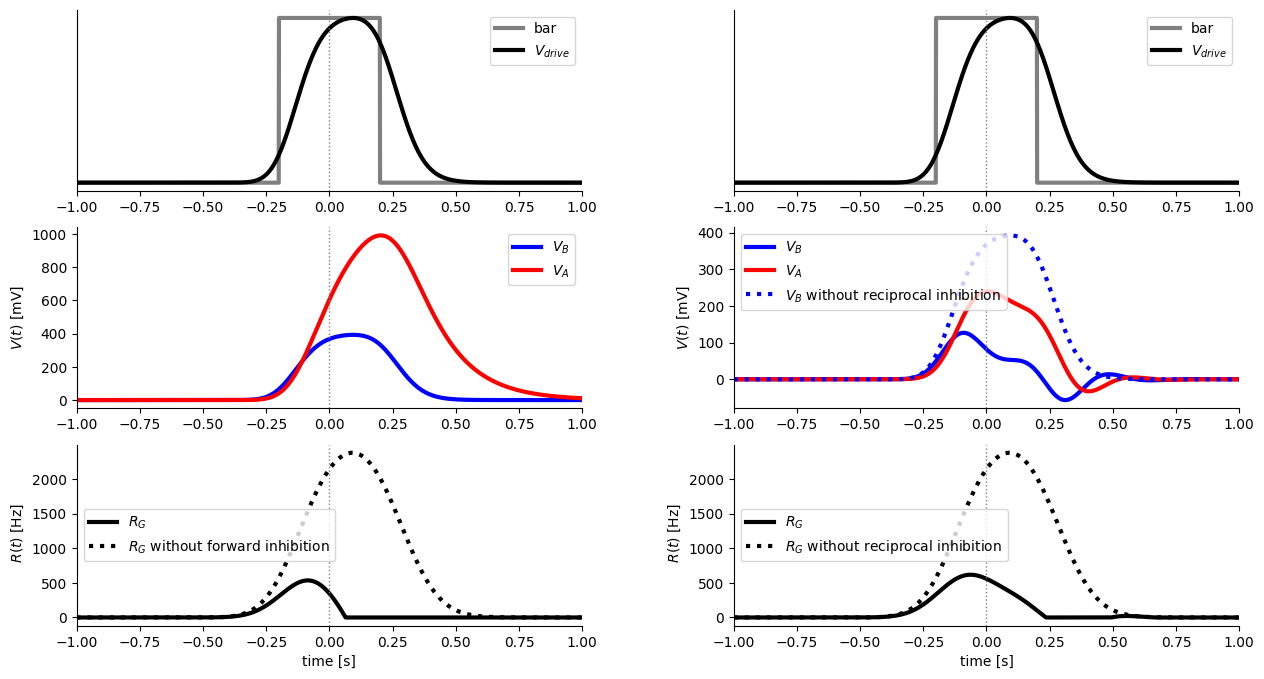

In [12]:

fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(nrows,ncols)



fig.subplots_adjust(wspace = .3)

ax = fig.add_subplot(gs[0,0])
sns.despine(ax = ax)

ax.plot(time_bar_centered ,stim_bar, linewidth = lw, color = cbar, label = 'bar')
ax.plot(time_bar_centered ,forward_bar_stc/forward_bar_stc.max(), label = '$V_{drive}$', color = 'k', linewidth = lw)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')

ax.legend()
ax.set_yticks([])


ax = fig.add_subplot(gs[1,0],sharex = ax)
sns.despine(ax = ax)


  

ax.plot(time_bar_centered,forward_bar_sigB, color = c1, linewidth = lw, label = '$V_{B}$')
ax.plot(time_bar_centered,forward_bar_sigA, color = c2, linewidth = lw, label = '$V_{A}$')

ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_ylabel('$V(t)$ [mV]')
ax.legend()



ax = fig.add_subplot(gs[2,0],sharex = ax)
sns.despine(ax = ax)


ax.plot(time_bar_centered,forward_bar_sigG, color = 'k', linewidth = lw, label = '$R_{G}$')
ax.plot(time_bar_centered,pooling_bar_sigG, linestyle = ':', color = 'k', linewidth = lw, label = '$R_{G}$ without forward inhibition')


ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.legend()
ax.set_ylabel(' $R(t)$ [Hz]')
ax.set_xlabel('time [s]')
ax.set_xlim(-1,1)




ax = fig.add_subplot(gs[0,1])
sns.despine(ax = ax)



ax.plot(time_bar_centered ,stim_bar, linewidth = lw, color = cbar, label = 'bar')
ax.plot(time_bar_centered ,forward_bar_stc/forward_bar_stc.max(), label = '$V_{drive}$', color = 'k', linewidth = lw)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.legend()
ax.set_yticks([])


ax = fig.add_subplot(gs[1,1],sharex = ax)
sns.despine(ax = ax)

  

ax.plot(time_bar_centered,recurrent_bar_sigB, color = c1, linewidth = lw, label = '$V_{B}$')
ax.plot(time_bar_centered,recurrent_bar_sigA, color = c2, linewidth = lw, label = '$V_{A}$')

ax.plot(time_bar_centered,pooling_bar_sigB, label = '$V_{B}$ without reciprocal inhibition', color = c1, linestyle = ':', linewidth = lw)

ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_ylabel('$V(t)$ [mV]')
ax.legend()



ax = fig.add_subplot(gs[2,1],sharex = ax)
sns.despine(ax = ax)

ax.plot(time_bar_centered,recurrent_bar_sigG, color = 'k', linewidth = lw, label = '$R_{G}$')
ax.plot(time_bar_centered,pooling_bar_sigG, linestyle = ':', color = 'k', linewidth = lw, label = '$R_{G}$ without reciprocal inhibition')


ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.legend()
ax.set_ylabel(' $R(t)$ [Hz]')
ax.set_xlabel('time [s]')
ax.set_xlim(-1,1)

fig.savefig('../plots/Figure_2.svg')

In [11]:
# TODO change legend positions and check for amplitudes 
# cange legends